# Título

# Bibliotecas & Configurações

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# formatar os números para mostrarem duas casa decimais
pd.options.display.float_format = '{:.2f}'.format

# configurações de cores
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configurações da fonte utilizada nos gráficos
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (15, 8)

# Dados

# Análises

O escopo desse projeto será mais limitado. Tratarei apenas dos dados sobre a Covid no Estado do Ceará, sem entrar em nenhum município específico. Buscamos analisar como anda o crescimento da doença no Estado desde o primeiro caso registrado e tentar obter previsões para as séries temporais de casos e óbitos utilizando o Prophet.

Além disso, faremos a mesma análise para a aplicação de vacinas contra a Covid no Estado do Ceará.

In [12]:
# importação dos dados
covid_ce = pd.read_csv('../data/dados_covid_ce.csv')

In [13]:
covid_ce.head()

,data,novos_casos,novos_obitos,total_casos,total_mortes,semana_epidemiologica,pop_estimada_2019
0,2020-03-16,9,0,9,0,202012,9132078.0
1,2020-03-17,1,0,10,0,202012,9132078.0
2,2020-03-18,9,0,19,0,202012,9132078.0
3,2020-03-19,5,0,24,0,202012,9132078.0
4,2020-03-20,44,0,68,0,202012,9132078.0


In [14]:
covid_ce['data'] = pd.to_datetime(covid_ce['data'], format = '%Y-%m-%d')

In [17]:
covid_ce = covid_ce.set_index('data').rename_axis(None)

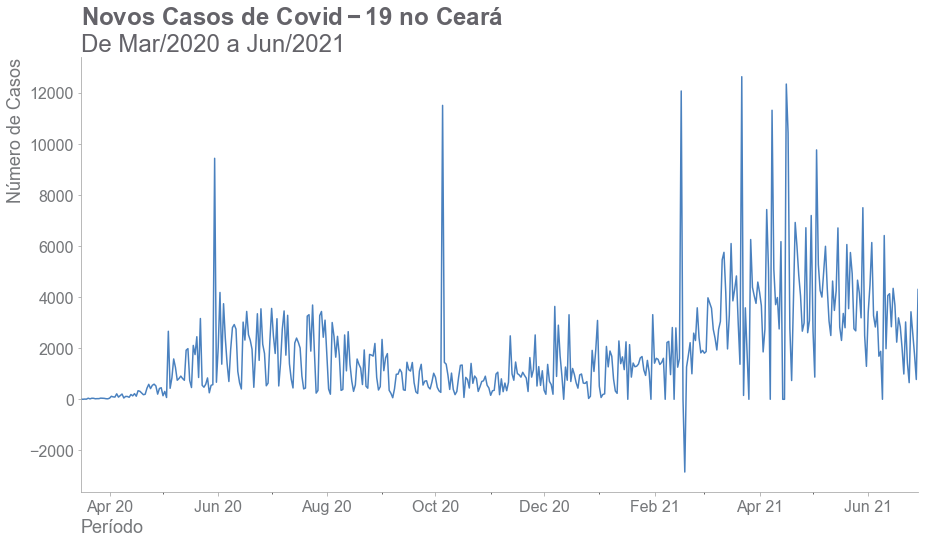

In [74]:
ax = covid_ce.novos_casos.plot(color = BLUE2)
plt.title('$\\bf{Novos\ Casos\ de\ Covid-19\ no\ Ceará}$\nDe Mar/2020 a Jun/2021',
         fontsize = 24, loc = 'left', color = GRAY4)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

# intervalo dos ticks do eixo x
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
# formata a data: %b - sigla do mês, %y - dois últimos dígitos do ano
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_color(GRAY5)

plt.ylabel('Número de Casos', loc = 'top', fontsize = 18, color = GRAY5)
plt.xlabel('Período', loc = 'left', fontsize = 18, color = GRAY5)

plt.show()

Essa série temporal está bastante poluída, até mesmo com valores abaixo de zero que podem representar correções nos dados. Uma melhor forma de visualizar isso seria com a média móvel.

In [52]:
# criando novas colunas no dataframe
covid_ce['media_movel_casos'] = covid_ce['novos_casos'].rolling(window = 7, center = False).mean()
covid_ce['media_movel_obitos'] = covid_ce['novos_obitos'].rolling(window = 7, center = False).mean()

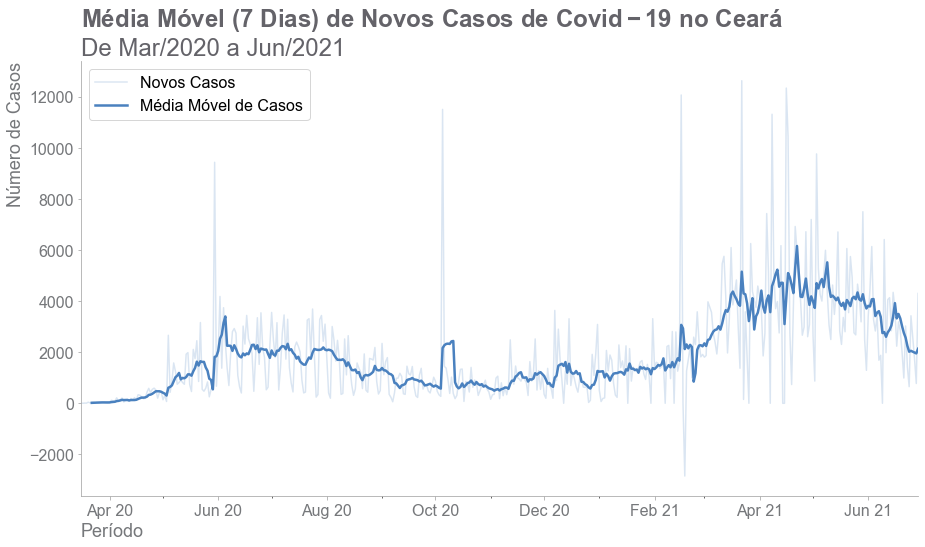

In [70]:
ax = covid_ce['novos_casos'].plot(label = 'Novos Casos', alpha = 0.2, lw = 1.5, color = BLUE2)
covid_ce['media_movel_casos'].plot(label = 'Média Móvel de Casos', lw = 2.5, color = BLUE2)
plt.title('$\\bf{Média\ Móvel\ (7\ Dias)\ de\ Novos\ Casos\ de\ Covid-19\ no\ Ceará}$\nDe Mar/2020 a Jun/2021',
         fontsize = 24, loc = 'left', color = GRAY4)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

# intervalo dos ticks do eixo x
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
# formata a data: %b - sigla do mês, %y - dois últimos dígitos do ano
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_color(GRAY5)

plt.ylabel('Número de Casos', loc = 'top', fontsize = 18, color = GRAY5)
plt.xlabel('Período', loc = 'left', fontsize = 18, color = GRAY5)

plt.legend()
plt.show()

Agora, ao utilizar a média móvel, temos uma série temporal bem mais comportada. Vamos olhar para o número de óbitos.

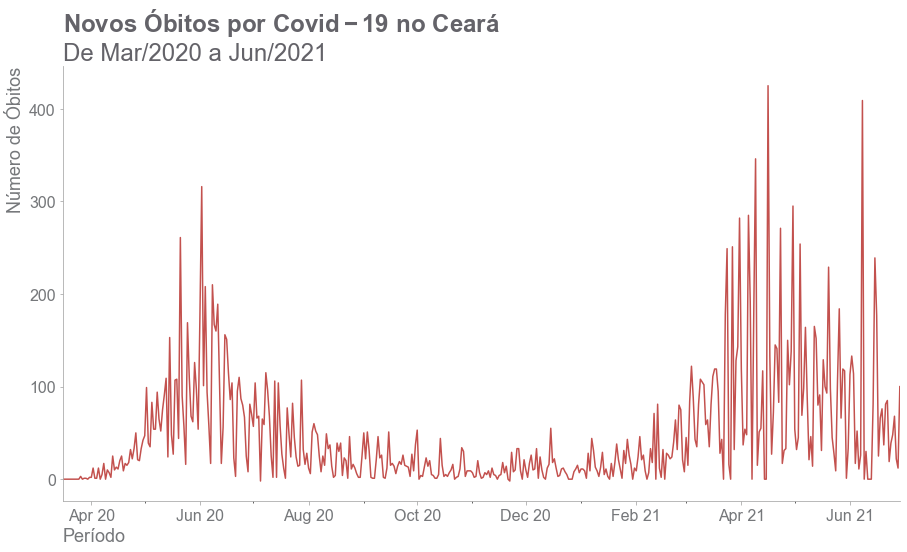

In [78]:
ax = covid_ce.novos_obitos.plot(color = RED1)
plt.title('$\\bf{Novos\ Óbitos\ por\ Covid-19\ no\ Ceará}$\nDe Mar/2020 a Jun/2021',
         fontsize = 24, loc = 'left', color = GRAY4)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

# intervalo dos ticks do eixo x
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
# formata a data: %b - sigla do mês, %y - dois últimos dígitos do ano
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_color(GRAY5)

plt.ylabel('Número de Óbitos', loc = 'top', fontsize = 18, color = GRAY5)
plt.xlabel('Período', loc = 'left', fontsize = 18, color = GRAY5)

plt.show()

Para o número de óbitos registrados diariamente não temos tantos valores abaixo de zero. Isso é de se esperar, pois o processo para registrar um óbito é bem mais complexo e burocrático, diminuindo a quantidade de erros inseridas no sistema.

Vamos agora olhar para a média móvel de novos óbitos.

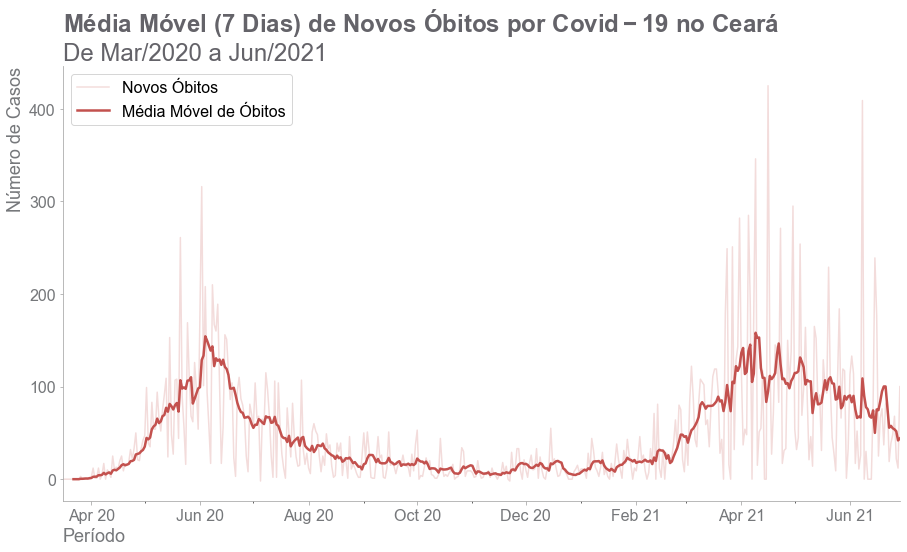

In [83]:
ax = covid_ce['novos_obitos'].plot(label = 'Novos Óbitos', alpha = 0.2, lw = 1.5, color = RED1)
covid_ce['media_movel_obitos'].plot(label = 'Média Móvel de Óbitos', lw = 2.5, color = RED1)
plt.title('$\\bf{Média\ Móvel\ (7\ Dias)\ de\ Novos\ Óbitos\ por\ Covid-19\ no\ Ceará}$\nDe Mar/2020 a Jun/2021',
         fontsize = 24, loc = 'left', color = GRAY4)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

# intervalo dos ticks do eixo x
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
# formata a data: %b - sigla do mês, %y - dois últimos dígitos do ano
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_color(GRAY5)

plt.ylabel('Número de Casos', loc = 'top', fontsize = 18, color = GRAY5)
plt.xlabel('Período', loc = 'left', fontsize = 18, color = GRAY5)

plt.legend()
plt.show()

Vamos comparar essas séries temporais.

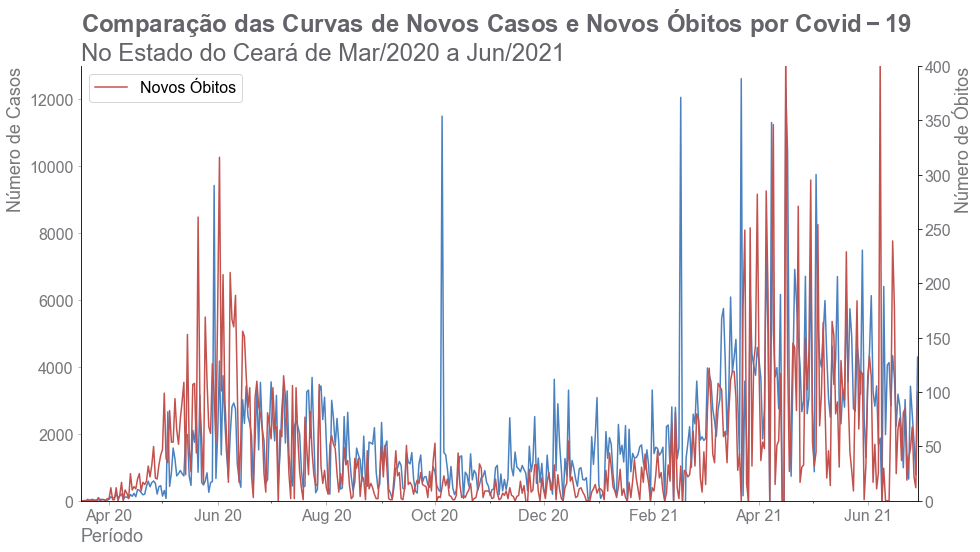

In [117]:
ax1 = covid_ce['novos_casos'].plot(label = 'Novos Casos', color = BLUE2)
ax2 = ax1.twinx()
ax2 = covid_ce['novos_obitos'].plot(label = 'Novos Óbitos', color = RED1)
plt.title('$\\bf{Comparação\ das\ Curvas\ de\ Novos\ Casos\ e\ Novos\ Óbitos\ por\ Covid-19}$\nNo Estado do Ceará de Mar/2020 a Jun/2021',
         fontsize = 24, loc = 'left', color = GRAY4)
ax1.tick_params(color = 'darkgrey', bottom = 'off')
ax1.spines['bottom'].set_color('darkgrey')
ax1.spines['left'].set_color('darkgrey')
ax1.spines['right'].set_color('darkgrey')
ax2.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_color(GRAY5)
for i in ax2.get_yticklabels() + ax2.get_xticklabels():
    i.set_color(GRAY5)

ax1.set_ylabel('Número de Casos', loc = 'top', fontsize = 18, color = GRAY5)
ax1.set_xlabel('Período', loc = 'left', fontsize = 18, color = GRAY5)
ax2.set_ylabel('Número de Óbitos', loc = 'top', fontsize = 18, color = GRAY5)

ax1.set_ylim(0, 13000)
ax2.set_ylim(0, 400)

plt.legend()
plt.show()

Mesmo sendo uma visualização poluída, conseguimos enxergar algumas conclusões.

Diferentemente de alguns outros estados, aqui, aparentemente, as duas curvas estão bem próximas, com pouco ou quase nenhum delay entre o número de morte e de novos casos no Ceará.

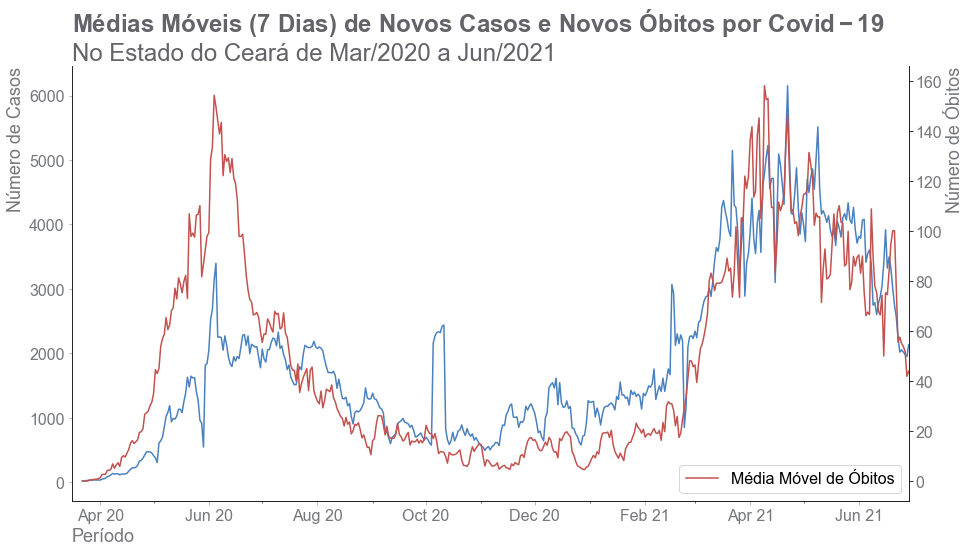

In [122]:
ax1 = covid_ce['media_movel_casos'].plot(label = 'Média Móvel de Casos', color = BLUE2)
ax2 = ax1.twinx()
ax2 = covid_ce['media_movel_obitos'].plot(label = 'Média Móvel de Óbitos', color = RED1)
plt.title('$\\bf{Médias\ Móveis\ (7\ Dias)\ de\ Novos\ Casos\ e\ Novos\ Óbitos\ por\ Covid-19}$\nNo Estado do Ceará de Mar/2020 a Jun/2021',
         fontsize = 24, loc = 'left', color = GRAY4)
ax1.tick_params(color = 'darkgrey', bottom = 'off')
ax1.spines['bottom'].set_color('darkgrey')
ax1.spines['left'].set_color('darkgrey')
ax1.spines['right'].set_color('darkgrey')
ax2.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_color(GRAY5)
for i in ax2.get_yticklabels() + ax2.get_xticklabels():
    i.set_color(GRAY5)

ax1.set_ylabel('Número de Casos', loc = 'top', fontsize = 18, color = GRAY5)
ax1.set_xlabel('Período', loc = 'left', fontsize = 18, color = GRAY5)
ax2.set_ylabel('Número de Óbitos', loc = 'top', fontsize = 18, color = GRAY5)

plt.legend()
plt.show()

As curvas acompanham bem uma a outra.

/home/carolina/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/carolina/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


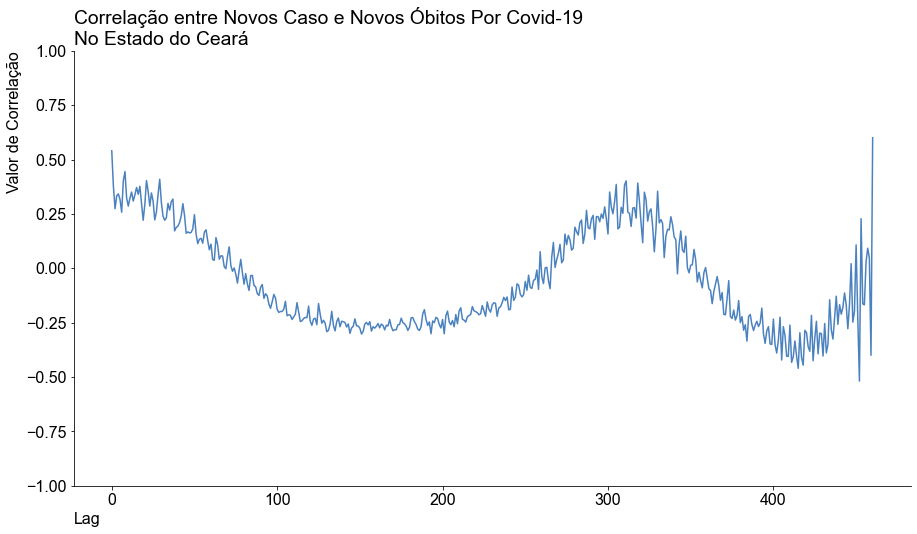

In [124]:
correlacao_obitos_casos = [covid_ce['novos_casos'].corr(covid_ce['novos_obitos'].shift(t)) for t in range(0, len(covid_ce))]
lag = range(0, len(covid_ce))
sns.lineplot(x = lag, y = correlacao_obitos_casos, color = BLUE2)
plt.ylim(-1, 1)
plt.title('Correlação entre Novos Caso e Novos Óbitos Por Covid-19\nNo Estado do Ceará', loc = 'left')
plt.xlabel('Lag', loc = 'left')
plt.ylabel('Valor de Correlação', loc = 'top')
sns.despine()
plt.show()

comentários sobre a correlação

# Análise Comparando as Vacinas com os Casos e Óbitos